 # Chapter 06 비지도 학습

# 06-1 군집 알고리즘

### 타깃을 모르는 비지도 학습
* 타깃이 없을 때 사용하는 머신러닝 알고리즘 '비지도 학습'

### 과일 사진 데이터 준비하기
* 넘파이 배열의 기본 저장 포맷은 npy

In [ ]:
# 파일 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy 

# '!' 리눅스 셸 명령
# -O 저장할 파일의 이름을 지정

--2021-06-25 06:19:20--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-06-25 06:19:20--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-06-25 06:19:20--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

(300, 100, 100)
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


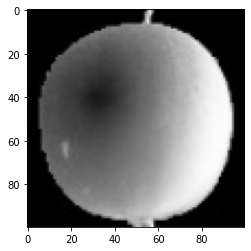

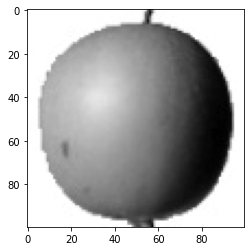

In [34]:
# 데이터 로드
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits.shape)

print(fruits[0, 0, :])

plt.imshow(fruits[0], cmap='gray') # 흑백 사진이라 gray로 변수 지정
plt.show()

# 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킴.
# 밝을수록 숫자가 커져서 좀 더 집중 가능.

# cmap을 'gray_r'로 지정하면 다시 반전되어 우리가 보기에 좋음
plt.imshow(fruits[0], cmap='gray_r')

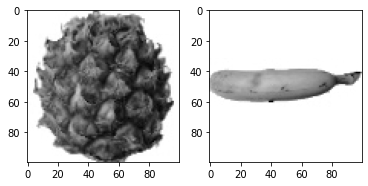

Figure(432x288)


In [ ]:
# 바나나, 파인애플
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()


### 픽셀값 분석하기
* 우선 사과, 파인애플, 바나나 각각으로 나누고 길이가 10000인 1차원 배열로 변환

(100, 10000)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


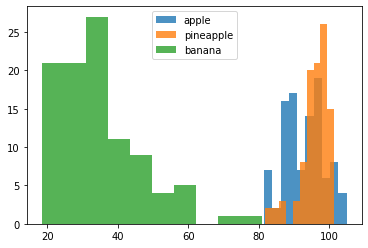

In [ ]:
# 자료처리
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)

print(apple.mean(axis=1))

# 히스토그램
plt.hist(np.mean(apple, axis=1), alpha=0.8)     # 여기선 왜 np.mean??
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()


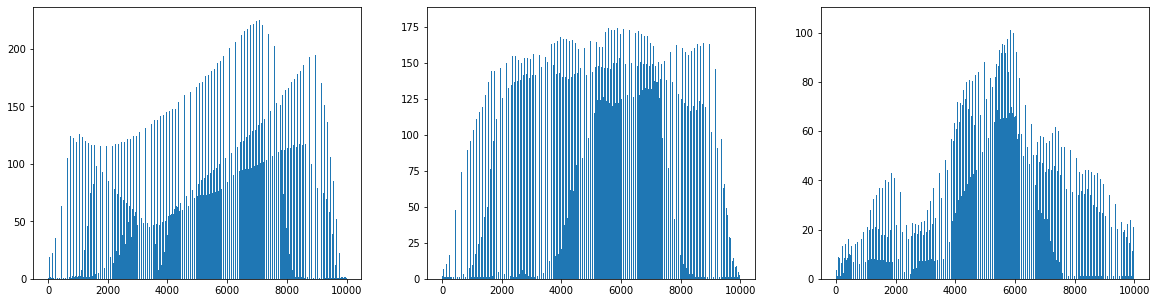

In [ ]:
# 픽셀 평균 활용
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

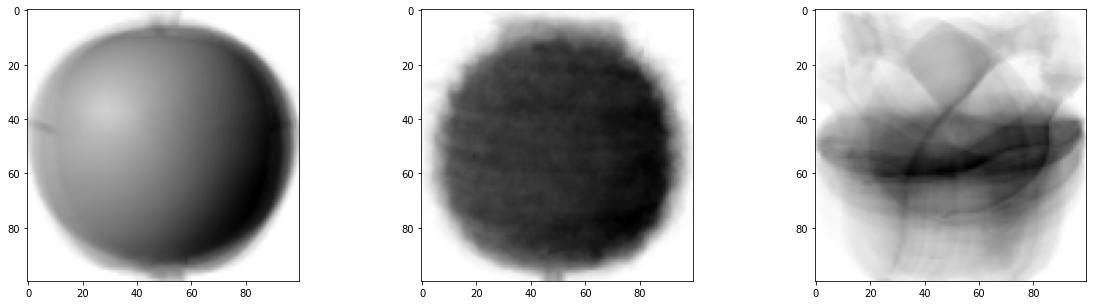

In [ ]:
# 픽셀 평균값을 이미지로
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

### 평균값과 가까운 사진 고르기
* 절댓값 평균 활용

(300,)


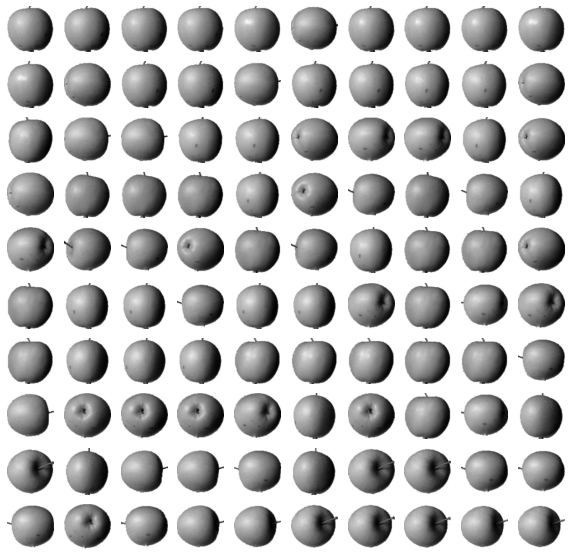

In [ ]:
# 오차 평균
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

# 오차 작은 100개 고르기
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')    # 좌표축 없앰
plt.show()

### 확인 문제
2번

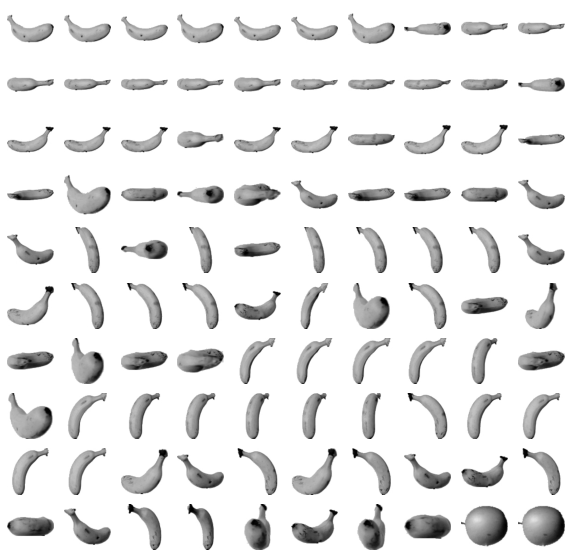

In [ ]:
abs_banana_diff = np.abs(fruits - banana_mean)
abs_mean_banana = np.mean(abs_banana_diff, axis=(1,2))

banana_index = np.argsort(abs_mean_banana)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()


## 06-2 k-평균
* k-평균 군집 알고리즘으로 평균값 자동으로 찾기
* 클러스터 중심 또는 센트로이드라고도 함

### k-평균 알고리즘 소개
작동 방식<br/>
1. 무작위로 k개의 클러스터 중심 결정
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복

### KMeans 클래스

In [ ]:
# 데이터 불러오기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

# 3차원 배열을 2차원배열로 변경
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2021-06-26 13:53:03--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-06-26 13:53:03--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-06-26 13:53:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
# KMeans 클래스
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

print(km.labels_)

print(np.unique(km.labels_, return_counts=True))

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [ ]:
# 그림으로 출력
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)   # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산.
    rows = int(np.ceil(n/10))  # 올림
    # 행이 1개면 열의 개수는 샘플 개수. 그렇지않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:   # n개 까지만 그림
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()


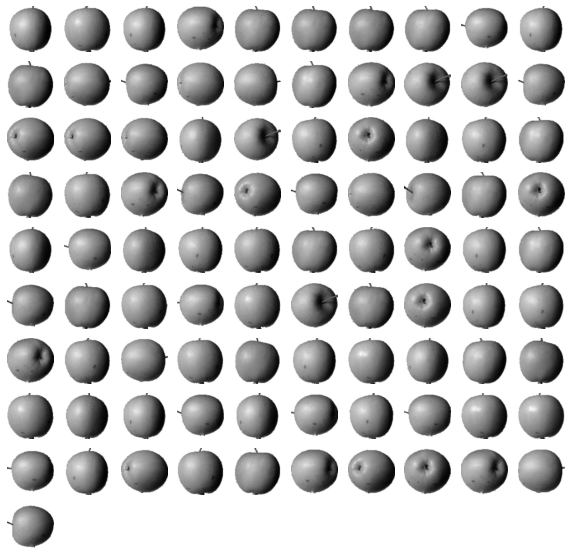

In [ ]:
# 불리언 인덱싱
# 0번 인덱스 그리기
draw_fruits(fruits[km.labels_==0])

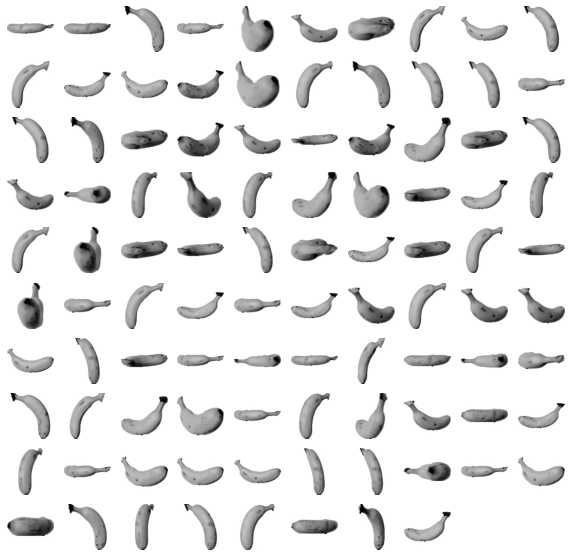

In [ ]:
# 1번 인덱스
draw_fruits(fruits[km.labels_==1])

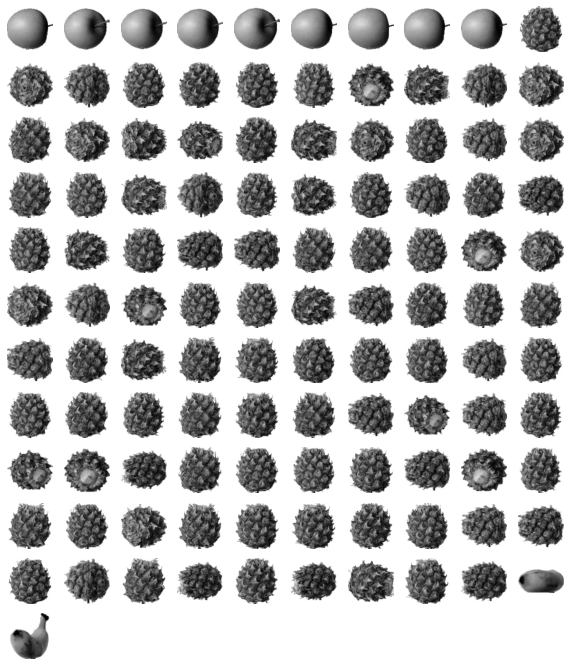

In [ ]:
# 2번 인덱스
draw_fruits(fruits[km.labels_==2])

### 클러스터 중심

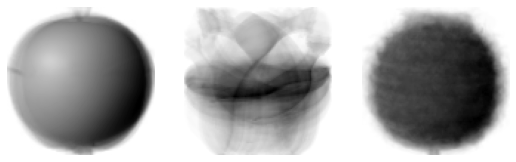

[[5267.70439881 8837.37750892 3393.8136117 ]]
[2]


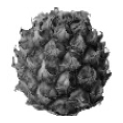

None
3


In [ ]:
# 클러스터 중심 이미지 출력
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

# transform 메서드
print(km.transform(fruits_2d[100:101])) # 2차원으로

# predict 메서드
print(km.predict(fruits_2d[100:101]))

print(draw_fruits(fruits[100:101], ratio=2))

# 알고리즘 반복 횟수
print(km.n_iter_)

### 최적의 k 찾기
* k-평균 알고리즘은 클러스터 개수를 사전에 지정해야됨.
* 엘보우로 찾기 가능.
* 이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지 나타내는 값


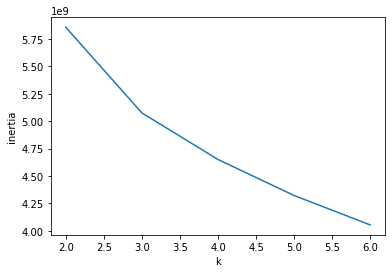

In [ ]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## 06-3 주성분 분석


### 차원과 차원 축소


### 주성분 분석 소개

### PCA 클래스

In [11]:
# 데이터 가져오기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2021-06-29 01:38:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-06-29 01:38:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-06-29 01:38:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

(50, 10000)


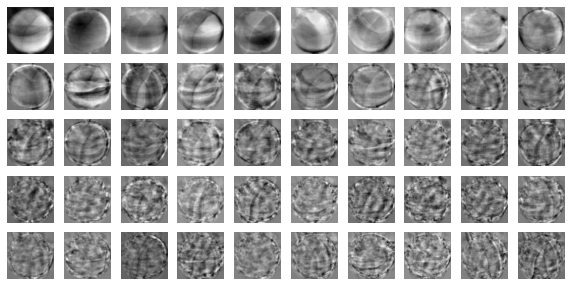

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

# 주성분
print(pca.components_.shape)

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [13]:
# 원본 데이터 차원 줄이기
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


### 원본 데이터 재구성


(300, 10000)


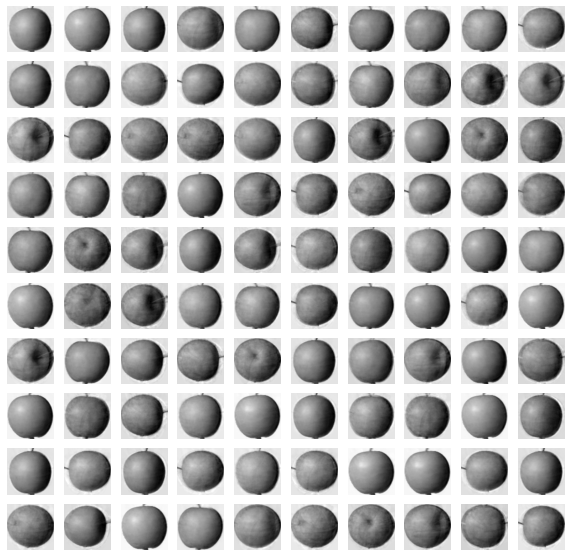

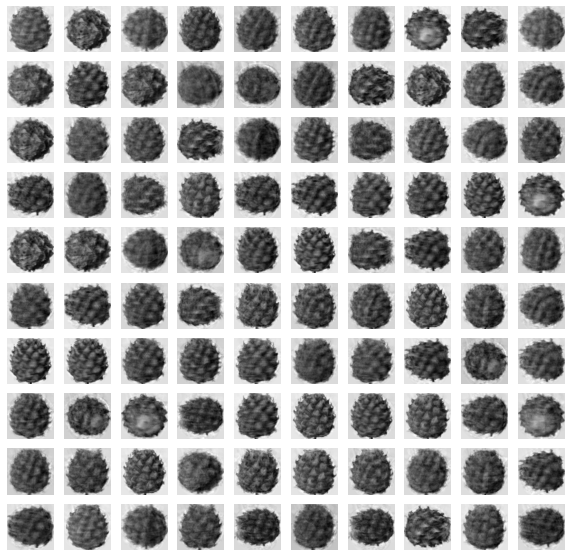

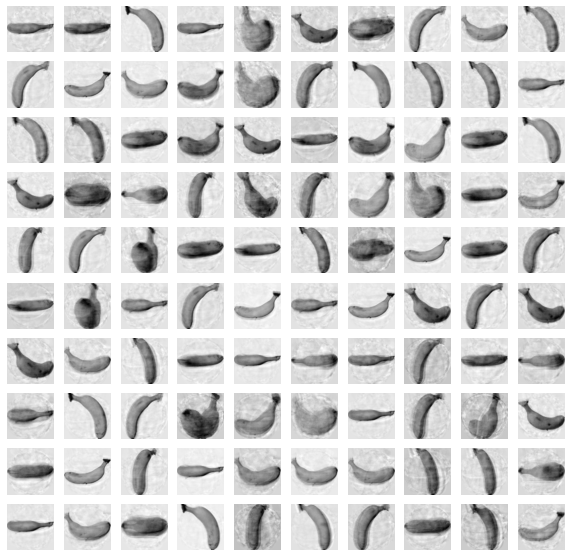

In [14]:
# 데이터 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

### 설명된 분산
* 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

0.9215427230978837


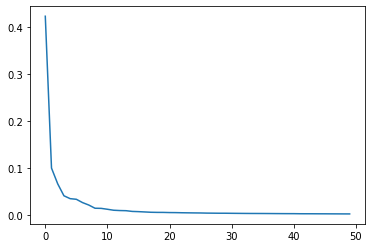

In [15]:
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

다른 알고리즘과 함께 사용하기

In [19]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 타깃 만들기
target = np.array([0]*100 + [1]*100 + [2]*100)

# 원본 데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 축소 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.3435303688049316
1.0
0.03442983627319336


In [25]:
# 원하는 분산 비율
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

2
(300, 2)
0.9933333333333334
0.051716852188110354


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


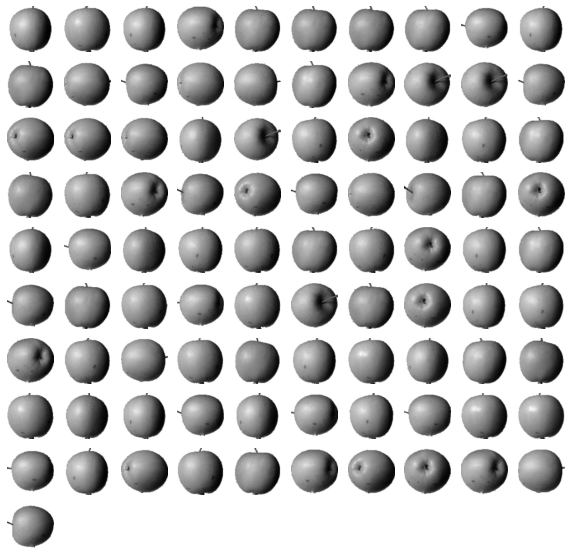

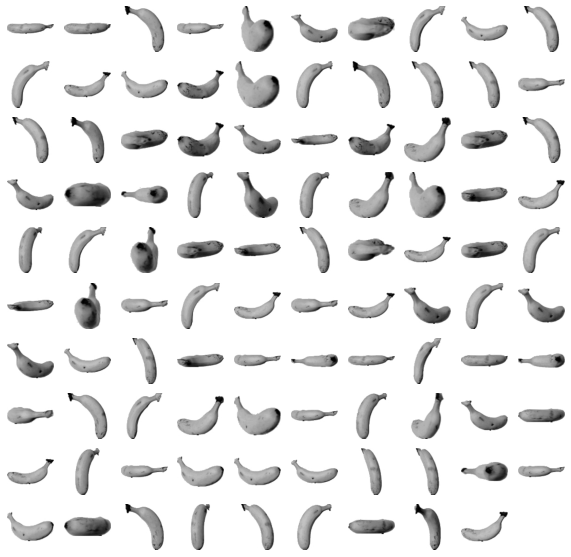

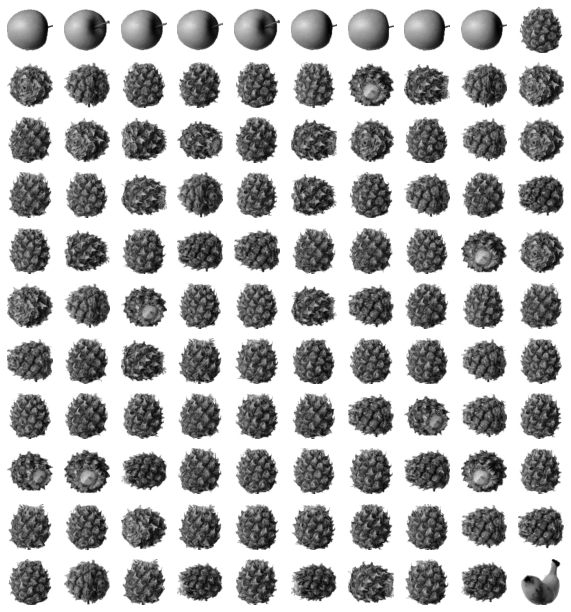

In [32]:
# k-평균 알고리즘
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

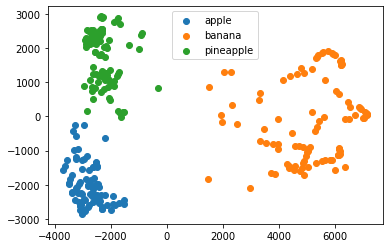

In [33]:
# 산점도
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()